# IMPORT LIBRARIES

In [1]:
import torch
import tensorflow
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [2]:
train = pd.read_csv(r"C:/Users/npt31/Downloads/DECISION__TREE_NLP/train.csv", index_col=0)
test = pd.read_csv(r"C:/Users/npt31/Downloads/DECISION__TREE_NLP/test.csv", index_col=0)
valid = pd.read_csv(r"C:/Users/npt31/Downloads/DECISION__TREE_NLP/valid.csv", index_col=0)



In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11426 entries, 0 to 11425
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   11426 non-null  object
 1   sentiment  11426 non-null  int64 
 2   topic      11426 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 357.1+ KB


In [4]:
train.drop(columns=['topic'], axis = 1, inplace=True)
valid.drop(columns=['topic'], axis = 1, inplace=True)
test.drop(columns=['topic'], axis = 1, inplace=True)


In [5]:
train = pd.concat([train, valid])

In [6]:
train.head()

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


In [7]:
x_train = train["sentence"].tolist()
x_test = test["sentence"].tolist()

y_train = train["sentiment"].tolist()
y_test = test["sentiment"].tolist()

In [8]:
vietnamese_stopwords = [
    'a', 'anh', 'ai', 'bài', 'bên', 'biết', 'các', 'cái', 'cần', 'chỉ', 'chia', 'cho', 'chúng', 'chung', 'có', 'còn', 
    'cũng', 'cả', 'cùng', 'của', 'cứ', 'cuối', 'đã', 'đang', 'đây', 'để', 'đến', 'đi', 'đó', 'đều', 'em', 'gì', 'hoặc', 
    'khi', 'không', 'là', 'lại', 'lên', 'lúc', 'mà', 'mình', 'một', 'nào', 'này', 'nên', 'nếu', 'người', 'như', 'nhưng', 
    'nhiều', 'những', 'rằng', 'ra', 'rất', 'rồi', 'sau', 'sẽ', 'thấy', 'thì', 'trên', 'trong', 'tôi', 'từ', 'tại', 'và', 
    'vẫn', 'vào', 'vì', 'với', 'được', 'đây', 'đó', 'ông', 'bà', 'chúng tôi', 'họ', 'các bạn'
]


# DECISION TREE CLASSIFIER

In [9]:
dt_clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=221, ) 
vcz_dt_clf = TfidfVectorizer(smooth_idf=True, strip_accents="unicode", lowercase= True, encoding="utf-8", stop_words=vietnamese_stopwords)

In [10]:
encoded_x_train = vcz_dt_clf.fit_transform(x_train) 
encoded_x_test = vcz_dt_clf.transform(x_test) 

c:\Users\npt31\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ba', 'bai', 'ban', 'ben', 'biet', 'ca', 'cac', 'cai', 'can', 'chi', 'co', 'con', 'cu', 'cua', 'cung', 'cuoi', 'gi', 'ho', 'hoac', 'khong', 'la', 'lai', 'len', 'luc', 'ma', 'minh', 'mot', 'nao', 'nay', 'nen', 'neu', 'nguoi', 'nhieu', 'nhu', 'nhung', 'ong', 'rang', 'rat', 'roi', 'se', 'tai', 'thay', 'thi', 'toi', 'tren', 'tu', 'va', 'van', 'vao', 'vi', 'voi', 'đa', 'đay', 'đe', 'đen', 'đeu', 'đo', 'đuoc'] not in stop_words.
  warnings.warn(


In [11]:
encoded_x_train

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 143719 stored elements and shape (13009, 1491)>

In [12]:
encoded_dt_clf=dt_clf.fit(encoded_x_train, y_train)

In [13]:
encoded_dt_clf

DecisionTreeClassifier(max_depth=3, random_state=221)

In [14]:
pred = dt_clf.predict(encoded_x_test)
pred

array([0, 2, 0, ..., 0, 0, 0])

# RESULT

In [18]:
print(classification_report(y_test, pred))


              precision    recall  f1-score   support

           0       0.63      0.95      0.75      1409
           1       0.00      0.00      0.00       167
           2       0.92      0.60      0.72      1590

    accuracy                           0.72      3166
   macro avg       0.52      0.52      0.49      3166
weighted avg       0.74      0.72      0.70      3166



c:\Users\npt31\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\npt31\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\npt31\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# CONFUSION MATRIX

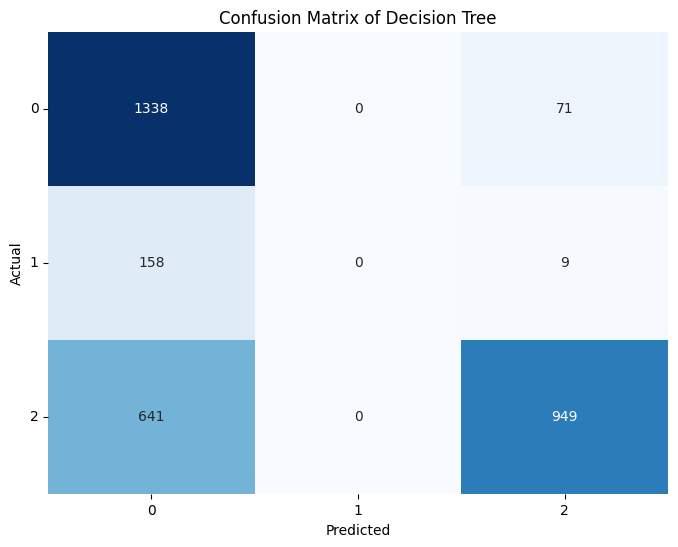

In [16]:
cm = confusion_matrix(y_test, pred)
labels = [0, 1, 2]
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)

# Add labels, title, and ticks
plt.title('Confusion Matrix of Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(np.arange(len(labels)) + 0.5, labels)
plt.yticks(np.arange(len(labels)) + 0.5, labels, rotation=0)
plt.show()

# VISUALIZE DECISION TREE

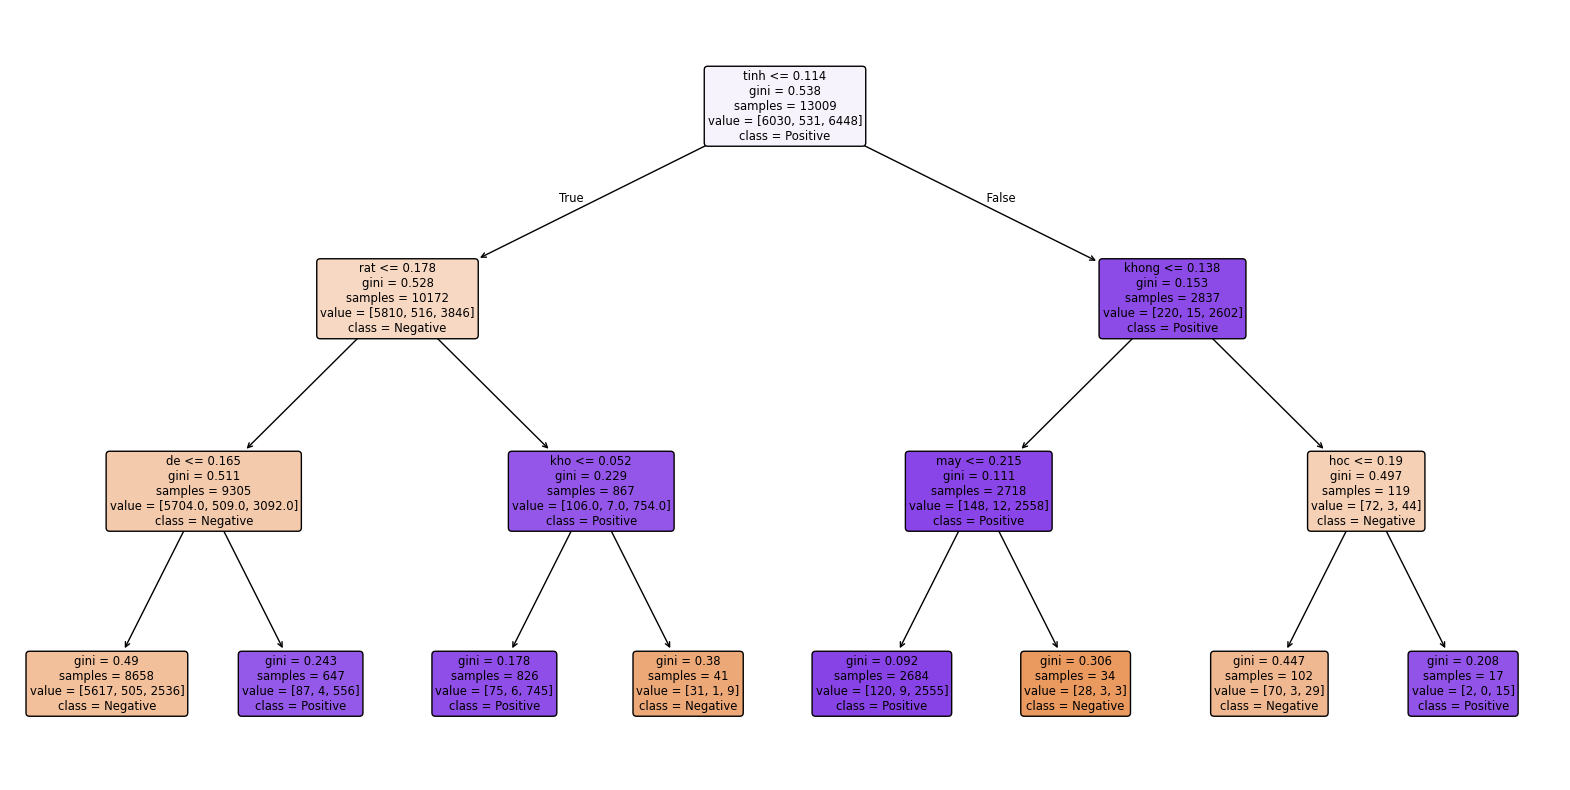

In [17]:
plt.figure(figsize=(20, 10))
tree.plot_tree(
    dt_clf,
    feature_names=vcz_dt_clf.get_feature_names_out(),
    class_names=['Negative', 'Neutral', 'Positive'],
    filled=True,
    rounded=True
)
plt.show()